<a href="https://colab.research.google.com/github/allenalvin333/College7/blob/master/T1/T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Allen Ben Philipose** - 18BIS0043
# **Lab Task - 1, Submitted to: Dr. Sankar Ganesh S**

## Example

In [ ]:
dataset = pd.read_csv('sample_data.csv')
print(dataset)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Nigeria  18.0  15000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11  Nigeria  50.0  60000.0       Yes
12   France  22.0  30000.0        No
13      NaN  44.0  45000.0       Yes
14   France  47.0  78000.0       NaN
15  Nigeria  35.0  43000.0       Yes
16    Spain  34.0  44000.0       Yes
17    Spain  27.0  48000.0       Yes
18    Spain  33.0  48000.0       Yes
19  Nigeria  29.0  77000.0       Yes
20    Spain   NaN  57000.0       Yes
21   France  44.0  48000.0       Yes
22  Germany  50.0  83000.0        No
23   France  37.0  67000.0       Yes
24   France  37.0  23000.0       Yes
25  Germany  45.0  50000.0        No
2

In [ ]:
dataset = dataset.drop_duplicates()
print(dataset)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Nigeria  18.0  15000.0        No
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11  Nigeria  50.0  60000.0       Yes
12   France  22.0  30000.0        No
13      NaN  44.0  45000.0       Yes
14   France  47.0  78000.0       NaN
15  Nigeria  35.0  43000.0       Yes
16    Spain  34.0  44000.0       Yes
18    Spain  33.0  48000.0       Yes
19  Nigeria  29.0  77000.0       Yes
20    Spain   NaN  57000.0       Yes
21   France  44.0  48000.0       Yes
24   France  37.0  23000.0       Yes
25  Germany  45.0  50000.0        No
27  Nigeria  30.0  30000.0       Yes
28  Nigeria  29.0  15000.0        No


# **0. Initialization**

In [2]:
pip install fuzzywuzzy

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [110]:
!cp -r /content/gdrive/MyDrive/Academic/Labs/ML/T1 /content/

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#1
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

#3
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

#4
import datetime

# **1. Dealing with Missing Values** 

## References
- https://www.kaggle.com/dansbecker/handling-missing-values
- https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93
- https://medium.com/x8-the-ai-community/handling-missing-values-in-data-54e1dc77e24f

## Dataset
- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home?select=melb_data.csv

## Explanation
*A common occurrence in a data-set is missing values. This can happen due to multiple reasons like unrecorded observations or data corruption. Pandas library provides a variety of functions for marking these corrupt values. We will study how we can remove or impute these values. There are many ways data can end up with missing values.*
- *A 2 bedroom house wouldn't include an answer for "How large is the third bedroom?"*
- *Someone being surveyed may choose not to share their income*

*Python libraries represent missing numbers as nan which is short for "not a number". Most libraries (including scikit-learn) will give you an error if you try to build a model using data with missing values.*
- *A Simple Option: **Drop Columns with Missing Values** - 
In many cases, you'll have both a training dataset and a test dataset. You will want to drop the same columns in both DataFrames*
- *A Better Option: **Imputation** - Imputation fills in the missing value with some number. The imputed value won't be exactly right in most cases, but it usually gives more accurate models than dropping the column entirely. The default behavior fills in the mean value for imputation. Statisticians have researched more complex strategies, but those complex strategies typically give no benefit once you plug the results into sophisticated machine learning models.*

## **Sample Program**

#### Dataset Inspection

In [12]:
df1 = pd.read_csv('/content/T1/2.csv')

In [13]:
df1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [14]:
df1.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [15]:
df1.info

<bound method DataFrame.info of               Suburb  ... Propertycount
0         Abbotsford  ...        4019.0
1         Abbotsford  ...        4019.0
2         Abbotsford  ...        4019.0
3         Abbotsford  ...        4019.0
4         Abbotsford  ...        4019.0
...              ...  ...           ...
13575  Wheelers Hill  ...        7392.0
13576   Williamstown  ...        6380.0
13577   Williamstown  ...        6380.0
13578   Williamstown  ...        6380.0
13579     Yarraville  ...        6543.0

[13580 rows x 21 columns]>

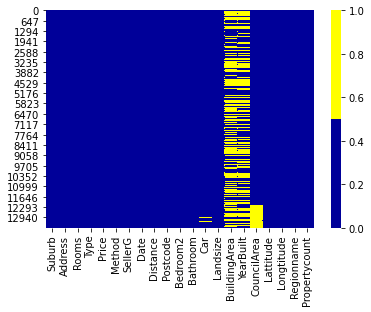

In [16]:
col1 = df1.columns[:30]
colours1 = ['#000099', '#ffff00']
sns.heatmap(df1[col1].isnull(), cmap=sns.color_palette(colours1))

*Yellow represents the missing data in the first 30 entries of the dataframe*

#### **Drop Columns**
*If those columns had useful information (in the places that were not missing), your model loses access to this information when the column is dropped. Also, if your test data has missing values in places where your training data did not, this will result in an error.*

In [17]:
df11 = df1.dropna(axis=1)

In [18]:
df11.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [19]:
df11.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,558.416127,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,3990.669241,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,177.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,440.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,651.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,433014.000000,-37.408530,145.526350,21650.000000


In [20]:
df1_cols = [col for col in df1.columns 
            if df1[col].isnull().any()]

In [21]:
print(df1_cols)

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']


In [22]:
df12 = df1.drop(df1_cols, axis=1)

In [23]:
df12.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [24]:
df12.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,558.416127,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,3990.669241,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,177.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,440.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,651.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,433014.000000,-37.408530,145.526350,21650.000000


*So, it's somewhat usually not the best solution. However, it can be useful when most values in a column are missing.*

#### **Imputation**
*Imputation is the standard approach, and it usually works well. However, imputed values may by systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way.*

In [25]:
df13 = df1.select_dtypes(exclude=['object'])

In [26]:
im1 = SimpleImputer()
df14 = im1.fit_transform(df13)

In [27]:
print(df14)

[[ 2.0000000e+00  1.4800000e+06  2.5000000e+00 ... -3.7799600e+01
   1.4499840e+02  4.0190000e+03]
 [ 2.0000000e+00  1.0350000e+06  2.5000000e+00 ... -3.7807900e+01
   1.4499340e+02  4.0190000e+03]
 [ 3.0000000e+00  1.4650000e+06  2.5000000e+00 ... -3.7809300e+01
   1.4499440e+02  4.0190000e+03]
 ...
 [ 3.0000000e+00  1.1700000e+06  6.8000000e+00 ... -3.7852740e+01
   1.4488738e+02  6.3800000e+03]
 [ 4.0000000e+00  2.5000000e+06  6.8000000e+00 ... -3.7859080e+01
   1.4489299e+02  6.3800000e+03]
 [ 4.0000000e+00  1.2850000e+06  6.3000000e+00 ... -3.7811880e+01
   1.4488449e+02  6.5430000e+03]]


#### **Comparitive Study**
*Let's see which method is better for dealing with the missing values in this dataset*

In [28]:
x1 = df1.drop(['Price'], axis=1)               # Predictors
y1 = df1.Price                                 # Target
x1_num = x1.select_dtypes(exclude=['object'])  # Numeric Predictors

In [29]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1_num,y1,train_size=0.7,
                                                    test_size=0.3,random_state=0)

In [30]:
def score_dataset_1(xtrain1, xtest1, ytrain1, ytest1):
    model1 = RandomForestRegressor()
    model1.fit(xtrain1, ytrain1)
    p1 = model1.predict(xtest1)
    return mean_absolute_error(ytest1, p1)

In [31]:
# Dropping Values
df15 = [col for col in xtrain1.columns if xtrain1[col].isnull().any()]
red_xtrain1 = xtrain1.drop(df15, axis=1)
red_xtest1  = xtest1.drop(df15, axis=1)
print("Mean Absolute Error from Dropping columns with Missing Values:")
print(score_dataset_1(red_xtrain1, red_xtest1, ytrain1, ytest1))

Mean Absolute Error from Dropping columns with Missing Values:
181118.67821935075


In [32]:
# Imputation
im2 = SimpleImputer()
imp_xtrain1 = im2.fit_transform(xtrain1)
imp_xtest1 = im2.transform(xtest1)
print("Mean Absolute Error from Imputation:")
print(score_dataset_1(imp_xtrain1, imp_xtest1, ytrain1, ytest1))

Mean Absolute Error from Imputation:
174206.7743274423


*Mean Absolute Error from Imputation is lesser. Using this method will help us to improve the model compared to dropping values*

# **2. Handling categorical data**

## References
- https://pbpython.com/categorical-encoding.html
- https://analyticsindiamag.com/complete-guide-to-handling-categorical-data-using-scikit-learn/
- https://towardsdatascience.com/handling-categorical-data-the-right-way-9d1279956fc6

## Dataset
- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home?select=melb_data.csv

## Explanation
*Categorical features have a lot to say about the dataset thus it should be converted to numerical to make it into a machine-readable format. Focusing only on numerical variables in the dataset isn’t enough to get good accuracy. Often categorical variables prove to be the most important factor and thus identify them. In many practical Data Science activities, the data set will contain categorical variables.*

*These variables are typically stored as text values which represent various traits. Some examples include color (“Red”, “Yellow”, “Blue”), size (“Small”, “Medium”, “Large”) or geographic designations (State or Country). Regardless of what the value is used for, the challenge is determining how to use this data in the analysis. Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. Therefore, the analyst is faced with the challenge of figuring out how to turn these text attributes into numerical values for further processing.*

*Currently, many resources advertise a wide variety of solutions that might seem to work at first, but are deeply wrong once thought through. This is especially true for non-ordinal categorical data, meaning that the classes are not ordered (As it might be for Good=0, Better=1, Best=2). A bit of clarity is needed to distinguish the approaches that Data Scientists should use from those that simply make the models run.*

*Two major types of categorical features are:*
- ***Nominal*** – *These are variables which are not related to each other in any order such as colour (black, blue, green).*
- ***Ordinal*** – *These are variables where a certain order can be found between them such as student grades (A, B, C, D, Fail).*

*There are many more ways by which categorical variables can be changed to numeric I’ve discussed some of the important and commonly used ones. Handling categorical variables is an important step for feature engineering. New variables can be formed by categorical variables and get more insight into the dataset.*

## **Sample Program**

#### Dataset Inspection

In [33]:
df2 = pd.read_csv('/content/T1/2.csv')

In [34]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [35]:
df2.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [36]:
df2.info

<bound method DataFrame.info of               Suburb  ... Propertycount
0         Abbotsford  ...        4019.0
1         Abbotsford  ...        4019.0
2         Abbotsford  ...        4019.0
3         Abbotsford  ...        4019.0
4         Abbotsford  ...        4019.0
...              ...  ...           ...
13575  Wheelers Hill  ...        7392.0
13576   Williamstown  ...        6380.0
13577   Williamstown  ...        6380.0
13578   Williamstown  ...        6380.0
13579     Yarraville  ...        6543.0

[13580 rows x 21 columns]>

In [37]:
s2 = (df2.dtypes=='object')
o2 = list(s2[s2].index)
print(o2)

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [38]:
features2 = df2[['Type','Method','Regionname']]
features2.head()

,Type,Method,Regionname
0,h,S,Northern Metropolitan
1,h,S,Northern Metropolitan
2,h,SP,Northern Metropolitan
3,h,PI,Northern Metropolitan
4,h,VB,Northern Metropolitan


In [39]:
features2.describe()

,Type,Method,Regionname
count,13580,13580,13580
unique,3,5,8
top,h,S,Southern Metropolitan
freq,9449,9022,4695


In [40]:
features2.Regionname.value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [41]:
features2.Type.value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [42]:
features2.Method.value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

#### **Label Encoding**
*Label encoding can uniquely number the different categories from 0 to n-1. Thus also termed as Integer encoding. LabelEncoder class from the scikit-learn library is used for this purpose.*

In [43]:
le21 = LabelEncoder()
df21 = features2[['Regionname']]
df21['Region'] = le21.fit_transform(features2['Regionname'])
df21.value_counts()

Regionname                  Region
Southern Metropolitan       5         4695
Northern Metropolitan       2         3890
Western Metropolitan        6         2948
Eastern Metropolitan        0         1471
South-Eastern Metropolitan  4          450
Eastern Victoria            1           53
Northern Victoria           3           41
Western Victoria            7           32
dtype: int64

In [44]:
le22 = LabelEncoder()
df22 = features2[['Type']]
df22['Type'] = le22.fit_transform(features2['Type'])
df22.value_counts()

Type
0       9449
2       3017
1       1114
dtype: int64

In [45]:
le23 = LabelEncoder()
df23 = features2[['Method']]
df23['Method'] = le23.fit_transform(features2['Method'])
df23.value_counts()

Method
1         9022
3         1703
0         1564
4         1199
2           92
dtype: int64

*LabelEncoder cannot handle missing values so it’s important to impute them. LabelEncoder can be used to store values using less disk space. This is simple to use and works well on tree-based algorithms. It cannot work for linear models, SVMs, or neural networks as their data needs to be standardized.*

#### **One Hot Encoding**
*One hot encoding is a binary encoding applied to categorical values. To increase performance one can also first perform label encoding then those integer variables to binary values which will become the most desired form of machine-readable.*

In [46]:
df24 = pd.get_dummies(features2['Regionname'])
df24.value_counts()

Eastern Metropolitan  Eastern Victoria  Northern Metropolitan  Northern Victoria  South-Eastern Metropolitan  Southern Metropolitan  Western Metropolitan  Western Victoria
0                     0                 0                      0                  0                           1                      0                     0                   4695
                                        1                      0                  0                           0                      0                     0                   3890
                                        0                      0                  0                           0                      1                     0                   2948
1                     0                 0                      0                  0                           0                      0                     0                   1471
0                     0                 0                      0                  1                         

In [47]:
df25 = pd.get_dummies(features2['Type'])
df25.value_counts()

h  t  u
1  0  0    9449
0  0  1    3017
   1  0    1114
dtype: int64

In [48]:
df26 = pd.get_dummies(features2['Method'])
df26.value_counts()

PI  S  SA  SP  VB
0   1  0   0   0     9022
    0  0   1   0     1703
1   0  0   0   0     1564
0   0  0   0   1     1199
       1   0   0       92
dtype: int64

*One hot encoding overcomes the limitations of label encoding and can be used in both tree-based and non-tree-based machine learning algorithms. The disadvantage is that for high cardinality, the feature space can really blow up quickly. The binary variables are often called “dummy variables” in statistics.*

#### **Label Binarizer**
*Scikit-learn also supports binary encoding by using the LabelBinarizer. We use a similar process as above to transform the data for the process of creating a pandas DataFrame.*

In [49]:
lb21 = LabelBinarizer()
lb24 = lb21.fit_transform(features2["Regionname"])
pd.DataFrame(lb24, columns=lb21.classes_).value_counts()

Eastern Metropolitan  Eastern Victoria  Northern Metropolitan  Northern Victoria  South-Eastern Metropolitan  Southern Metropolitan  Western Metropolitan  Western Victoria
0                     0                 0                      0                  0                           1                      0                     0                   4695
                                        1                      0                  0                           0                      0                     0                   3890
                                        0                      0                  0                           0                      1                     0                   2948
1                     0                 0                      0                  0                           0                      0                     0                   1471
0                     0                 0                      0                  1                         

In [50]:
lb22 = LabelBinarizer()
lb25 = lb22.fit_transform(features2["Type"])
pd.DataFrame(lb25, columns=lb22.classes_).value_counts()

h  t  u
1  0  0    9449
0  0  1    3017
   1  0    1114
dtype: int64

In [51]:
lb23 = LabelBinarizer()
lb26 = lb23.fit_transform(features2["Method"])
pd.DataFrame(lb26, columns=lb23.classes_).value_counts()

PI  S  SA  SP  VB
0   1  0   0   0     9022
    0  0   1   0     1703
1   0  0   0   0     1564
0   0  0   0   1     1199
       1   0   0       92
dtype: int64

# **3. Dealing with inconsistent data entry**

## References
- https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93
- https://www.kaggle.com/rtatman/data-cleaning-challenge-inconsistent-data-entry
- https://www.kaggle.com/alexisbcook/inconsistent-data-entry
- https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

## Dataset
- https://www.kaggle.com/zusmani/pakistansuicideattacks

## Explanation
*Data cleaning or cleansing is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.*
*It is also crucial to have the dataset follow specific standards to fit a model. We need to explore the data in different ways to find out the inconsistent data. Much of the time, it depends on observations and experience. There is no set code to run and fix them all.*

*Three inconsistent data types are:*
- ***Capitalization*** - *Inconsistent  usage of upper and lower cases in categorical values is a common mistake. It could cause issues since analyses in Python is case sensitive.*
- ***Formats*** - *Another standardization we need to perform is the data formats. One example is to convert the feature from string to DateTime format.*
- ***Categorical Values*** - *Inconsistent categorical values are the last inconsistent type we cover. A categorical feature has a limited number of values. Sometimes there may be other values due to reasons such as typos.*

*To avoid **capitalization inconsistencies**, we can put all letters to lower cases (or upper cases).*

*For avoiding **Format inconsistencies** we can convert it and extract the date or time values by using the code below. After this, it’s easier to analyze the transaction volume group by either year or month.*

***Categorical Value inconsistencies*** *can easily be identified by fuzzy logic (or edit distance). It measures how many letters (distance) we need to change the spelling of one value to match with another value.*

## **Sample Program**

#### Dataset Inspection

In [52]:
np.random.seed(0)

`df3 = pd.read_csv('/content/T1/1.csv')` 
> This statement gives a character encoding error.

In [53]:
with open("/content/T1/1.csv", 'rb') as rd:
    res = chardet.detect(rd.read(100000))
print(res)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [54]:
df3 = pd.read_csv('/content/T1/1.csv',encoding='Windows-1252')

In [55]:
df3.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,Location Category,Location Sensitivity,Open/Closed Space,Influencing Event/Event,Target Type,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,Foreign,High,Closed,NaN,Foreigner,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,Office Building,Low,Closed,NaN,Media,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,Hotel,Medium,Closed,NaN,Foreigner,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,Foreign,High,Closed,NaN,Foreigner,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,Religious,Medium,Closed,during Friday prayer,Religious,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [56]:
df3.describe()

,S#,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,496.000000,493.000000,350.000000,480.000000,365.000000,414.000000,491.000000,489.000000
mean,248.500000,32.614705,14.725714,15.206250,31.397260,1.115942,21.111599,69.972579
std,143.327132,2.475917,17.600930,20.270436,38.603842,0.394989,8.369068,15.069622
min,1.000000,24.879503,0.000000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,124.750000,31.823800,3.000000,3.000000,7.000000,1.000000,14.690000,58.370000
50%,248.500000,33.583300,8.000000,8.000000,20.000000,1.000000,21.405000,70.529000
75%,372.250000,34.004300,20.000000,18.250000,40.000000,1.000000,28.115000,82.499000
max,496.000000,35.383300,125.000000,148.000000,320.000000,4.000000,44.000000,111.000000


In [57]:
df3.info

<bound method DataFrame.info of       S#                       Date  ... Temperature(C) Temperature(F)
0      1    Sunday-November 19-1995  ...         15.835         60.503
1      2     Monday-November 6-2000  ...         23.770         74.786
2      3       Wednesday-May 8-2002  ...         31.460         88.628
3      4        Friday-June 14-2002  ...         31.430         88.574
4      5         Friday-July 4-2003  ...         33.120         91.616
..   ...                        ...  ...            ...            ...
491  492   Thursday-October-05-2017  ...         27.800         81.000
492  493   Thursday-October-19-2017  ...         26.000         79.000
493  494   Thursday-November-9-2017  ...         25.000         77.000
494  495    Friday-November-24-2017  ...         22.000         72.000
495  496  Saturday-November-25-2017  ...         29.000         84.000

[496 rows x 26 columns]>

#### **Manual Correction**
*The first thing to do is to convert everything to lower case and remove any white spaces at the beginning and end of cells. Inconsistencies in capitalizations and trailing white spaces are very common in text data.*

In [58]:
x3 = df3['City'].unique()

In [59]:
len(x3)

93

In [60]:
x3.sort()
x3

array(['ATTOCK', 'Attock ', 'Bajaur Agency', 'Bannu', 'Bhakkar ', 'Buner',
       'Chakwal ', 'Chaman', 'Charsadda', 'Charsadda ', 'D. I Khan',
       'D.G Khan', 'D.G Khan ', 'D.I Khan', 'D.I Khan ', 'Dara Adam Khel',
       'Dara Adam khel', 'Fateh Jang', 'Ghallanai, Mohmand Agency ',
       'Gujrat', 'Hangu', 'Haripur', 'Hayatabad', 'Islamabad',
       'Islamabad ', 'Jacobabad', 'KURRAM AGENCY', 'Karachi', 'Karachi ',
       'Karak', 'Khanewal', 'Khuzdar', 'Khyber Agency', 'Khyber Agency ',
       'Kohat', 'Kohat ', 'Kuram Agency ', 'Lahore', 'Lahore ',
       'Lakki Marwat', 'Lakki marwat', 'Lasbela', 'Lower Dir', 'MULTAN',
       'Malakand ', 'Mansehra', 'Mardan', 'Mohmand Agency',
       'Mohmand Agency ', 'Mohmand agency', 'Mosal Kor, Mohmand Agency',
       'Multan', 'Muzaffarabad', 'North Waziristan', 'North waziristan',
       'Nowshehra', 'Orakzai Agency', 'Peshawar', 'Peshawar ', 'Pishin',
       'Poonch', 'Quetta', 'Quetta ', 'Rawalpindi', 'Sargodha',
       'Sehwan town',

In [61]:
df3['City'] = df3['City'].str.lower()

In [62]:
df3['City'] = df3['City'].str.strip()

In [63]:
y3 = df3['City'].unique()

In [64]:
len(y3)

67

In [65]:
y3.sort()
y3

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd. i khan', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'ghallanai, mohmand agency',
       'gujrat', 'hangu', 'haripur', 'hayatabad', 'islamabad',
       'jacobabad', 'karachi', 'karak', 'khanewal', 'khuzdar',
       'khyber agency', 'kohat', 'kuram agency', 'kurram agency',
       'lahore', 'lakki marwat', 'lasbela', 'lower dir', 'malakand',
       'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=

In [66]:
print("Redundant Values: {}".format(len(x3)-len(y3)))

Redundant Values: 26


*We can fix a good 80% of your text data entry inconsistencies by doing this. There's a more efficient way to do this though*

#### **Fuzzy Matching**
*The process of automatically finding text strings that are very similar to the target string. In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another.*

In [67]:
a3 = fuzzywuzzy.process.extract("d.i khan", y3, limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
a3

[('d. i khan', 100),
 ('d.i khan', 100),
 ('d.g khan', 88),
 ('khanewal', 50),
 ('sudhanoti', 47)]

In [68]:
def replace_matches_in_column_3(df, column, string_to_match, min_ratio = 85):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    rows_with_matches = df[column].isin(close_matches)
    df.loc[rows_with_matches, column] = string_to_match  
    print("Completed")

In [69]:
replace_matches_in_column_3(df=df3, column='City', string_to_match="d.i khan")

Completed


In [70]:
z3 = df3['City'].unique()

In [71]:
len(z3)

65

In [72]:
z3.sort()
z3

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd.i khan', 'dara adam khel', 'fateh jang',
       'ghallanai, mohmand agency', 'gujrat', 'hangu', 'haripur',
       'hayatabad', 'islamabad', 'jacobabad', 'karachi', 'karak',
       'khanewal', 'khuzdar', 'khyber agency', 'kohat', 'kuram agency',
       'kurram agency', 'lahore', 'lakki marwat', 'lasbela', 'lower dir',
       'malakand', 'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)

In [73]:
print("Redundant Values: {}".format(len(x3)-len(z3)))

Redundant Values: 28


*So "apple" and "snapple" are two changes away from each other (add "s" and "n") while "in" and "on" are one change away (replace "i" with "o"). We won't always be able to rely on fuzzy matching 100%, but it is comparitively efficient.*

# **4.	Handling Dates and Times**

## References
- https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates
- https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96
- https://predictablynoisy.com/posts/2017/2017-03-16-dates_in_python/
- https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f

## Dataset
- https://www.kaggle.com/nasa/landslide-events

## Explanation
*Dates and times are rich sources of information that can be used with machine learning models. However, these datetime variables do require some feature engineering to turn them into numerical data. In this post, I will demonstrate how to create datetime features with built in pandas functions for your machine learning models.*

*Pandas uses the **object** dtype for storing various types of data types, but most often when you see a column with the dtype **object** it will have strings in it.*

*There's also a specific **datetime64** dtypes in the pandas documentation. Since the dtype of our column is **object** rather than **datetime64**, Python doesn't know that this column contains dates.*

*The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are **%d** for day, **%m** for month, **%y** for a two-digit year and **%Y** for a four digit year.*

## **Sample Program**

#### Dataset Inspection

In [111]:
np.random.seed(0)

In [112]:
df4 = pd.read_csv('/content/T1/3.csv')

In [113]:
df4.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [114]:
df4.describe()

,id,population,distance,latitude,longitude,injuries,fatalities
count,1693.000000,1.693000e+03,1692.000000,1692.000000,1692.000000,515.000000,1446.000000
mean,4145.027761,9.345940e+04,7.822695,27.715661,-86.883660,0.526214,1.459198
std,2236.741960,5.226016e+05,9.358256,14.206341,14.332811,3.427514,9.184653
min,34.000000,0.000000e+00,0.000030,-10.125800,-117.309200,0.000000,0.000000
25%,2330.000000,2.080000e+03,1.936360,14.085650,-92.646625,0.000000,0.000000
50%,4087.000000,5.785000e+03,4.538635,35.613200,-83.653000,0.000000,0.000000
75%,6098.000000,1.886700e+04,9.873865,39.546400,-78.851325,0.000000,0.000000
max,7541.000000,1.229419e+07,74.460970,45.425700,-45.601000,45.000000,280.000000


In [115]:
df4.info

<bound method DataFrame.info of         id  ...                                        source_link
0       34  ...      http://www.nbc4.com/news/11186871/detail.html
1       42  ...  http://www.cantonrep.com/index.php?ID=345054&C...
2       56  ...  https://web.archive.org/web/20080423132842/htt...
3       59  ...  http://www.hebdos.net/lsc/edition162007/articl...
4       61  ...                                                NaN
...    ...  ...                                                ...
1688  7535  ...  http://www.tryondailybulletin.com/2016/02/26/u...
1689  7537  ...  http://www.wvgazettemail.com/news/20160222/us-...
1690  7539  ...  http://www.bdtonline.com/news/officials-cautio...
1691  7540  ...  http://www.bdtonline.com/news/rockslide-snarls...
1692  7541  ...  http://www.vnews.com/home/21353539-95/loose-ledge

[1693 rows x 23 columns]>

#### **Date Parsing**
*Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.*

In [116]:
print(df4['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [117]:
df4['date'].dtype

dtype('O')

`df4['new_date'] = pd.to_datetime(df4['Date'], format = "%m/%d/%y")` 
> This statement gave an error because there are multiple date formats in a single column.

In [120]:
df4['new_date'] = pd.to_datetime(df4['date'], infer_datetime_format=True)

In [121]:
df4['new_date'].dtype

dtype('<M8[ns]')

In [123]:
day4 = df4['new_date'].dt.day
day4

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: new_date, Length: 1693, dtype: float64

In [125]:
month4 = df4['new_date'].dt.month
month4

0        3.0
1        3.0
2        4.0
3        4.0
4        4.0
        ... 
1688    12.0
1689     2.0
1690     2.0
1691     2.0
1692     3.0
Name: new_date, Length: 1693, dtype: float64

In [126]:
year4 = df4['new_date'].dt.year
year4

0       2007.0
1       2007.0
2       2007.0
3       2007.0
4       2007.0
         ...  
1688    2015.0
1689    2016.0
1690    2016.0
1691    2016.0
1692    2016.0
Name: new_date, Length: 1693, dtype: float64

In [128]:
day4 = day4.dropna()
month4 = month4.dropna()
year4 = year4.dropna()

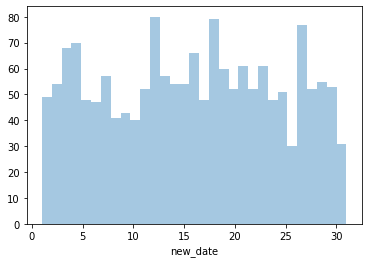

In [129]:
sns.distplot(day4, kde=False, bins=31)

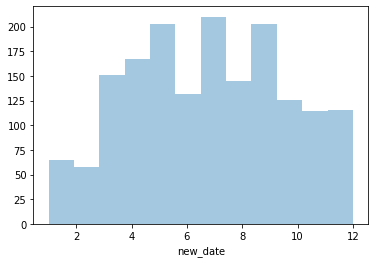

In [130]:
sns.distplot(month4, kde=False, bins=12)

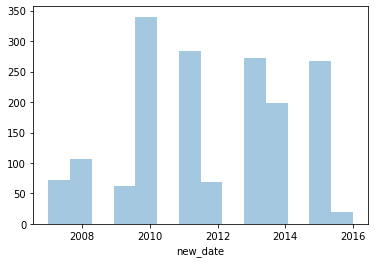

In [132]:
sns.distplot(year4, kde=False)

*There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.*

# **5. Scaling and Normalization**

## References
- https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data
- https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
- https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
- https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

## Dataset

## Explanation

## **Sample Program**